# Marketing Analytics

The goal of this analysis it to improve the perfomance of marketing activities, with a special focus on marketing campaings.
Thus the following steps were followed:
- Clean and understand the available data through univariate analysis
- Carry a exploratory data analysis to identify profit gains in the next marketing campaign
- Build a predictive model based on clustering analysis to segment customers characteristic features and suppport marketing initiatives 

Table of Contents  
1. [Setup](#ID1)     
    1.1. [Libraries](#ID1.1)     
    1.2. [Loading Data](#ID1.2)     
2. [Univariate analysis and Cleaning Data](#ID2)     
    2.1. [Data Overview](#ID2.1)     
    2.2. [Univariate analysis](#ID2.2)
3. [Exploratory Data Analysis](#ID3)   
    3.1. [Conversion Rates](#ID3.1)  
    3.2. [Loss Profitability Per Acquisition](#ID3.2)  
    3.3. [Total Amount Spent](#ID3.3)  
    3.4. [Income](#ID3.4)      
    3.5. [Age](#ID3.5)    
    3.6. [Education](#ID3.6)   
    3.7. [Living Arrangements](#ID3.7) 
4. [Clustering Analysis](#ID4)    
    4.1. [Correlation](#ID4.1)      
    4.2. [Scale data](#ID4.2)   
    4.3. [Fit K-Means Clustering Algorithm](#ID4.3)  
    4.4. [Convergence per cluster](#ID4.4)   
    4.5. [Custering Centroides](#ID4.5)    

## 1. Setup <a class="anchor" id="ID1"></a>

### 1.1. Libraries <a class="anchor" id="ID1.1"></a>

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### 1.2. Loading Data <a class="anchor" id="ID1.2"></a>

In [168]:
df_original = pd.read_csv('ml_project1_data.csv')
df = df_original.copy()

print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Cleaning Data through Univariate analysis <a class="anchor" id="ID2"></a>

### 2.1. Data Overview <a class="anchor" id="ID2.1"></a>

In [169]:
# Shape
print("This dataset has", df.shape[1], "columns and", df.shape[0], "rows.")

This dataset has 29 columns and 2240 rows.


In [170]:
# Duplicates
print("This dataset has", df[df.duplicated()].shape[0], "duplicated rows.")

This dataset has 0 duplicated rows.


In [171]:
# Missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The column 'Income' there are 24 missing values (around 1%), wich is acceptable. We can drop these values.

In [172]:
df=df.dropna()

In [173]:
# Data types
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

The columns' names are not standardize and do not ease the analysis. 
A fix is to create prefix based on the type of data:
 - ct: categorical 
 - int: integer value
 - flt: continuous data
 - dt: data

### 2.2. Univariate analysis <a class="anchor" id="ID2.2"></a>

In [421]:
# Function that to rename column:
def ren_colum(old,new):
    df.rename(columns={old:new},inplace=True)

# Function to change type:
def change_type(column, datatype):
    df[column] = df[column].astype(datatype)
    
# Function for boxplot
def plot_boxplot(column, title, x):
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[column])
    plt.title(title) 
    plt.xlabel(x) 
    
# Function for barplot
def plot_countplot(column, title, x):
    plt.figure(figsize=(10, 2))
    sns.countplot(x=df[column])
    plt.title(title) 
    plt.xlabel(x) 
    plt.ylabel('Count') 

#### Column: ID 
Description: Customer's unique identifier

Although it's a integer column it provides a description for the consumer and it is not usefull for statisticall analysis

In [175]:
df.drop(columns=['ID'], inplace = True)

#### Column: Year_Birth
Description: Customer's birth year

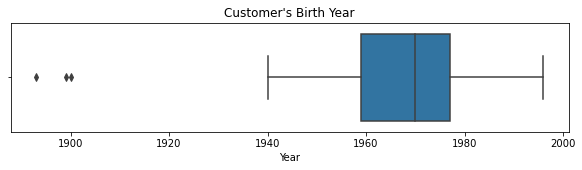

In [176]:
ren_colum('Year_Birth','int_year_birth')
plot_boxplot('int_year_birth','Customer\'s Birth Year','Year')

In [177]:
#Some values are around 1900, which looks inconsistent
df.int_year_birth.describe()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: int_year_birth, dtype: float64

In [178]:
# Remove outliers in year_birth (data located away from 3 standard deviations from the mean value
df = df[df.int_year_birth >= (df.int_year_birth.mean()-3*df.int_year_birth.std())]

#### Column: Education
Description: Customer's education level

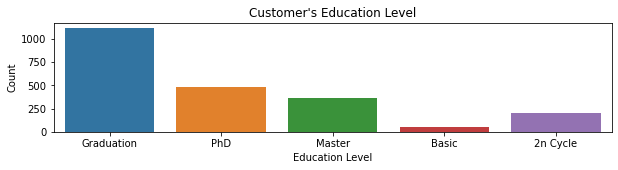

In [179]:
ren_colum('Education','ct_education_level')
plot_countplot('ct_education_level','Customer\'s Education Level','Education Level') 

We understand that education is a categorical data that can be ordinate, which can bring further insights 
Besides, '2n Cycle' can be merged with 'Master' 

In [180]:
df.replace(to_replace=['2n Cycle'], 
           value='Master', inplace= True) 

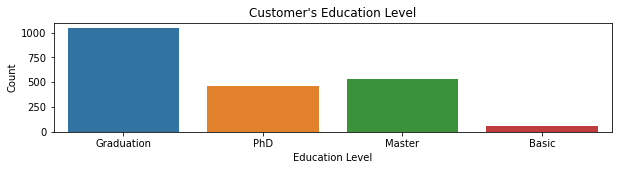

In [410]:
plot_countplot('ct_education_level','Customer\'s Education Level','Education Level') 

In [181]:
### Create a new ordinal column based on the level of education
def get_education_level(ct_education_level):
    if ct_education_level == 'Basic':
        return 1
    elif ct_education_level == 'Graduation':
        return 2
    elif ct_education_level == 'Master':
        return 3
    elif ct_education_level == 'PhD':
        return 4

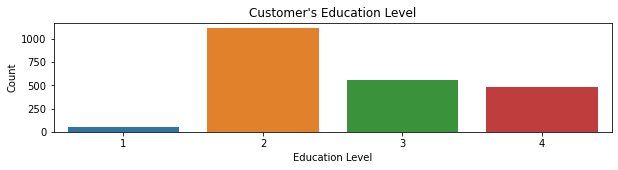

In [182]:
### apply the get_education_level function to the ds_education_level column
df['int_education_level'] = df['ct_education_level'].apply(get_education_level)

plot_countplot('int_education_level','Customer\'s Education Level','Education Level')

#### Column: Marital_Status
Description: Customer's marital status

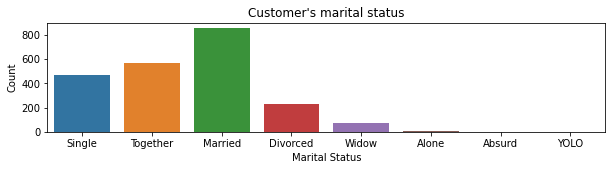

In [183]:
ren_colum('Marital_Status','ct_marital_status')
plot_countplot('ct_marital_status','Customer\'s marital status','Marital Status')

We found categories that seam inconsistent: “YOLO”, “Absurd”, “Alone”
 - It makes sense to replace "Alone" with "Single"
 - For "YOLO" and "Absurd" we replace with NaN.

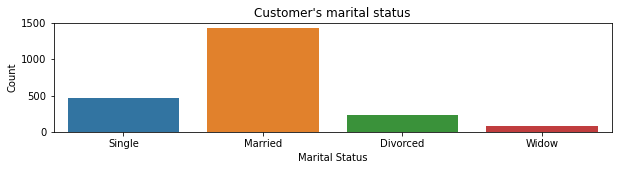

In [184]:
df.replace(to_replace=['Alone'], 
           value='Single', inplace= True) 
df.replace(to_replace=['Together'], 
           value='Married', inplace= True) 

df = df.drop(df[df['ct_marital_status'] == 'YOLO'].index)
df = df.drop(df[df['ct_marital_status'] == 'Absurd'].index)

plot_countplot('ct_marital_status','Customer\'s marital status','Marital Status')

We can also create anorder categorical data separating people that are in a relationship from people that are not in a relationship 

In [185]:
### Create a new ordinal column based on the marital status
def get_marital_status(ct_marital_status):
    if ct_marital_status == 'Single':
        return 'Not in a Relationship'
    elif ct_marital_status == 'Together':
        return 'In a Relationship'
    elif ct_marital_status == 'Married':
        return 'In a Relationship'
    elif ct_marital_status == 'Divorced':
        return 'Not in a Relationship'
    elif ct_marital_status == 'Widow':
        return 'Not in a Relationship'

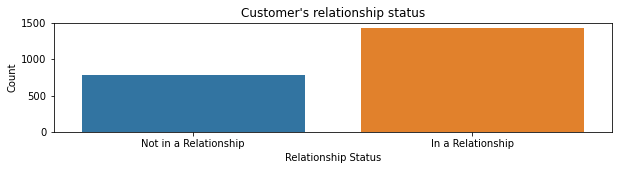

In [186]:
### apply the get_education_level function to the ds_education_level column
df['ct_relationship_status'] = df['ct_marital_status'].apply(get_marital_status)
plot_countplot('ct_relationship_status','Customer\'s relationship status','Relationship Status')

#### Column: Income
Description: Customer's yearly household income

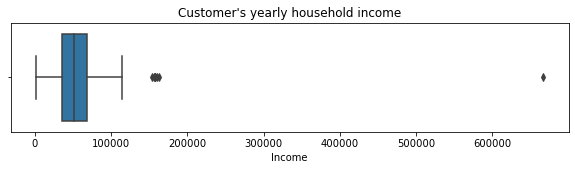

In [187]:
ren_colum('Income','int_income')
change_type('int_income','int64')
plot_boxplot('int_income','Customer\'s yearly household income','Income')

In [188]:
#Some values are above 600000, which seams like outlier
df.int_income.describe()

count      2209.000000
mean      52221.801720
std       25193.001847
min        1730.000000
25%       35196.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: int_income, dtype: float64

In [189]:
# Remove outliers in int_income (data located away from 3 standard deviations from the mean value)
df = df[df.int_income <= (df.int_income.mean()+3*df.int_income.std())]

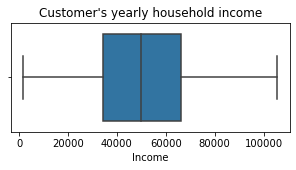

In [418]:
plot_boxplot('int_income','Customer\'s yearly household income','Income')

In [412]:
df.int_income.describe()

count      2093.000000
mean      50239.153846
std       20081.294398
min        1730.000000
25%       34487.000000
50%       49681.000000
75%       66000.000000
max      105471.000000
Name: int_income, dtype: float64

#### Columns: Kidhome and Teenhome
Description: Number of kid/teen in customer's household

In [191]:
ren_colum('Kidhome','int_qt_kidhome')
ren_colum('Teenhome', 'int_qt_teenhome')

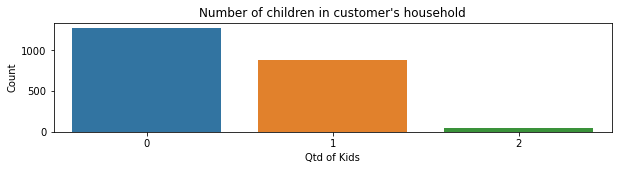

In [192]:
plot_countplot('int_qt_kidhome','Number of children in customer\'s household','Qtd of Kids')

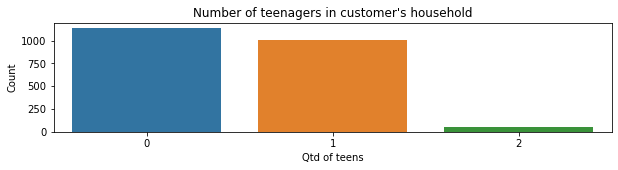

In [193]:
plot_countplot('int_qt_teenhome','Number of teenagers in customer\'s household','Qtd of teens')

It also make sense to understand the total amount of children in the family  

In [194]:
df['int_qt_childrenhome'] = df['int_qt_kidhome']+ df['int_qt_teenhome']

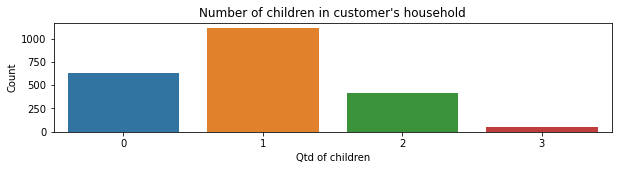

In [195]:
plot_countplot('int_qt_childrenhome','Number of children in customer\'s household','Qtd of children')

#### Columns: Dt_Customer
Description: Date of customer's enrollment with the company

In [196]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
ren_colum('Dt_Customer','dt_customer')

<AxesSubplot:xlabel='dt_customer'>

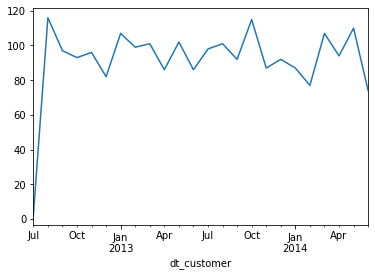

In [197]:
df.groupby(
    pd.Grouper(key='dt_customer', freq='M')
    ).count().int_year_birth.plot(x='index')

In [198]:
# From this variable we can calculate the year, the month and the weekday
# that person became a customer
df["int_join_year"] = df.dt_customer.dt.year
df["int_join_month"] = df.dt_customer.dt.month
df["int_join_weekday"] = df.dt_customer.dt.weekday + 1

In [199]:
# We can also calculate the age when becoming a customer
df["int_age"] = df.int_join_year - df.int_year_birth

In [200]:
# We can drop the int_year_birth column as 
# it wont't be usefull for the analysis 
df.drop(columns=['int_year_birth'], inplace = True)

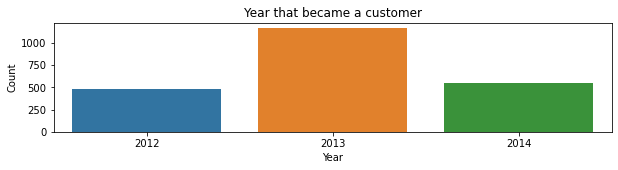

In [201]:
plot_countplot('int_join_year','Year that became a customer', 'Year')

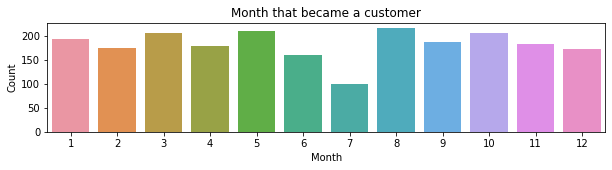

In [202]:
plot_countplot('int_join_month','Month that became a customer', 'Month')

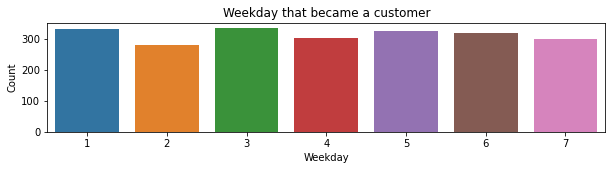

In [203]:
plot_countplot('int_join_weekday','Weekday that became a customer', 'Weekday')

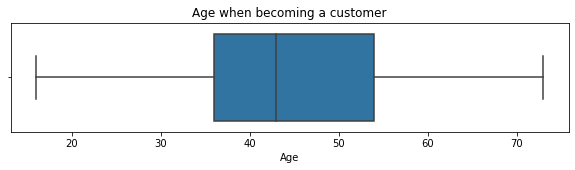

In [422]:
plot_boxplot('int_age','Age when becoming a customer','Age')

In [416]:
df.int_age.describe()

count    2093.000000
mean       44.237458
std        11.710681
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: int_age, dtype: float64

#### Columns: Recency
Description: Number of days since customer's last purchase

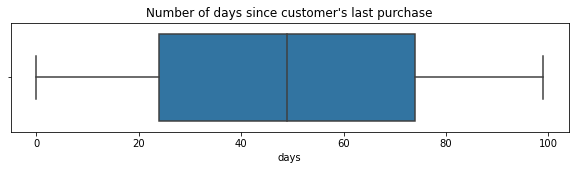

In [205]:
ren_colum('Recency','int_recency_days')
plot_boxplot('int_recency_days','Number of days since customer\'s last purchase','days')

#### Columns: Mnt...
Description: Amount spent in last 2 years with the products

In [206]:
ren_colum('MntWines','int_mnt_wine')
ren_colum('MntFruits','int_mnt_fruit')
ren_colum('MntMeatProducts','int_mnt_meat')
ren_colum('MntFishProducts','int_mnt_fish')
ren_colum('MntSweetProducts','int_mnt_sweet')
ren_colum('MntGoldProds','int_mnt_gold')

We can also calculate the total amount spent in the last two years

In [207]:
df['int_mnt_total'] = df.int_mnt_wine + df.int_mnt_fruit+ df.int_mnt_meat + df.int_mnt_fish + df.int_mnt_sweet + df.int_mnt_gold 

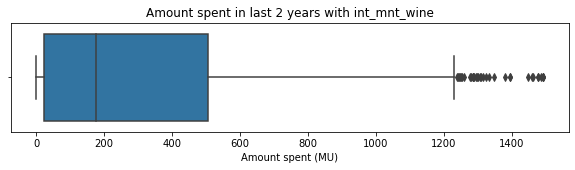

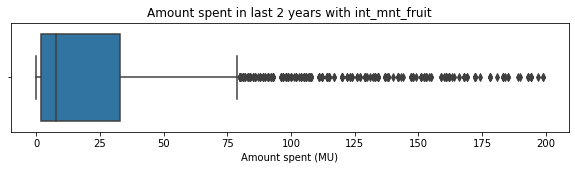

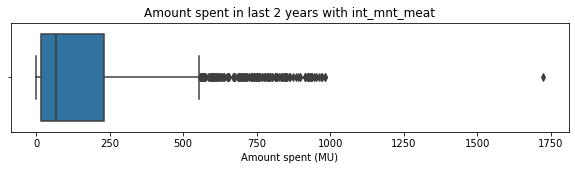

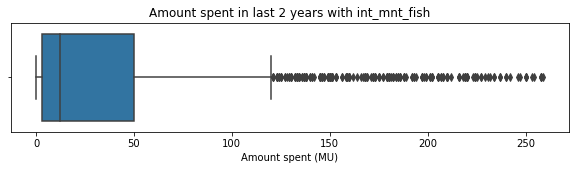

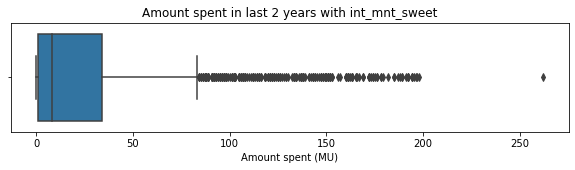

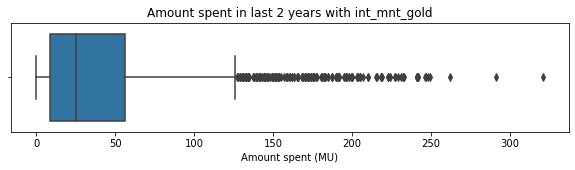

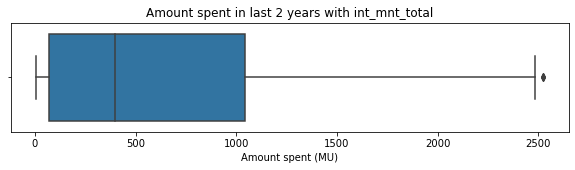

In [208]:
for col in [col for col in df if col.startswith('int_mnt_')]:
    plot_boxplot(col,f'Amount spent in last 2 years with {col}','Amount spent (MU)')

In [209]:
# Remove outliers in int_mnt_meat and int_mnt_sweet (data located away from 3 standard deviations from the mean value)
df = df[df.int_mnt_meat <= (df.int_mnt_meat.mean()+3*df.int_mnt_meat.std())]
df = df[df.int_mnt_sweet <= (df.int_mnt_sweet.mean()+3*df.int_mnt_sweet.std())]

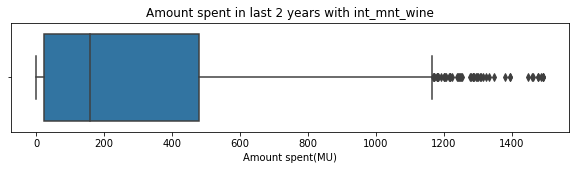

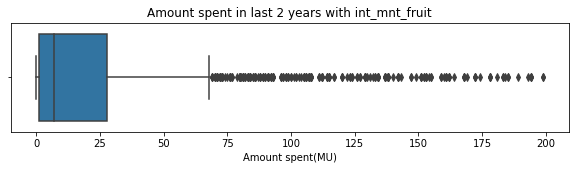

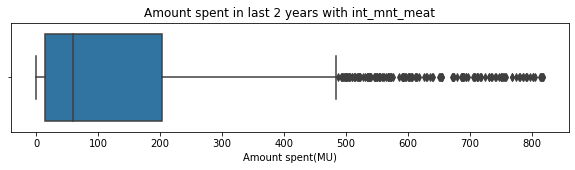

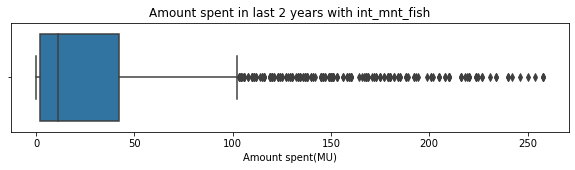

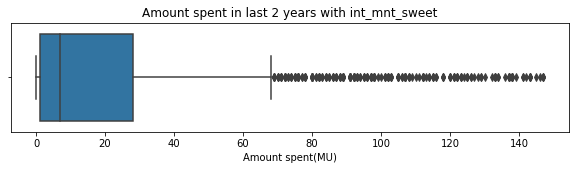

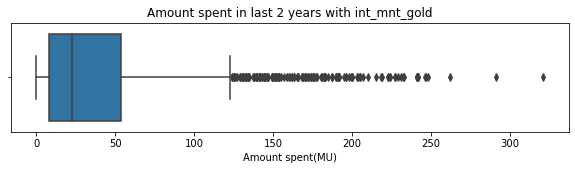

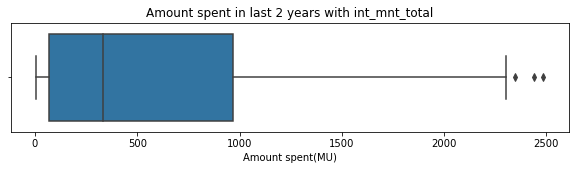

In [423]:
for col in [col for col in df if col.startswith('int_mnt_')]:
    plot_boxplot(col,f'Amount spent in last 2 years with {col}','Amount spent(MU)')

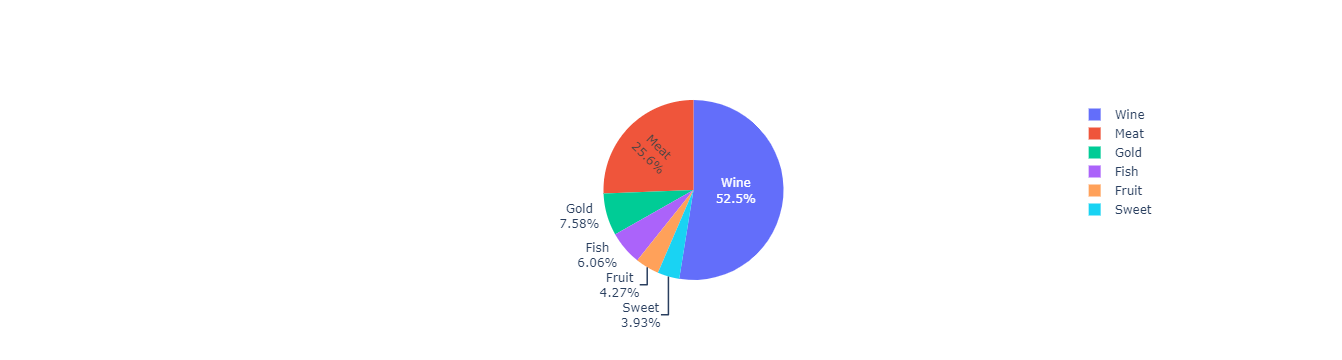

In [443]:
#measuring amont spent per segmentation of products
amount_spent = []
for col in [col for col in df if col.startswith('int_mnt_')]:
    amount_spent.append(df[col].sum())

amount_spent.pop()
labels = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']

import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=labels, values=amount_spent, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

#### Columns: Num...
Description: Number of purchases

In [211]:
#  with discount
ren_colum('NumDealsPurchases','int_num_pur_deal')
# website
ren_colum('NumWebPurchases','int_num_pur_web')
# catalog
ren_colum('NumCatalogPurchases','int_num_pur_catalog')
# stores
ren_colum('NumStorePurchases','int_num_pur_store')

We can also calculate the total amount of purchases

In [212]:
df['int_num_pur_total'] = df.int_num_pur_deal + df.int_num_pur_web + df.int_num_pur_catalog + df.int_num_pur_store

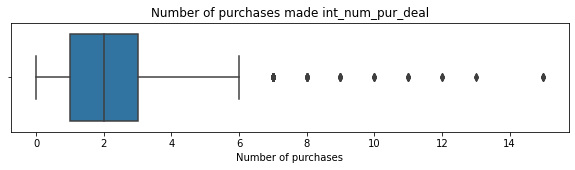

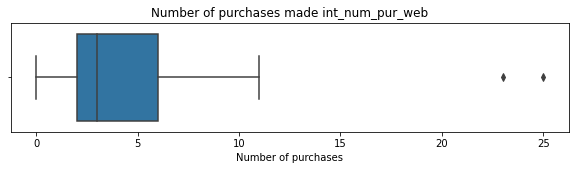

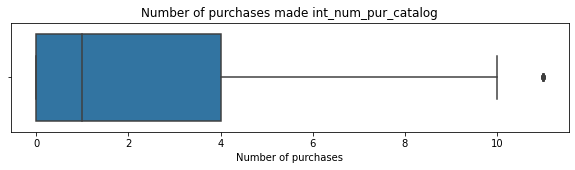

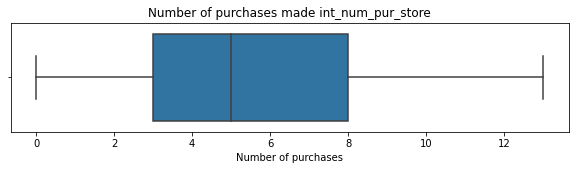

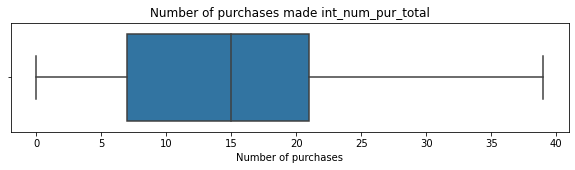

In [445]:
for col in [col for col in df if col.startswith('int_num_pur_')]:
    plot_boxplot(col,f'Number of purchases made {col}','Number of purchases')

int_num_pur_deal
int_num_pur_web
int_num_pur_catalog
int_num_pur_store
int_num_pur_total


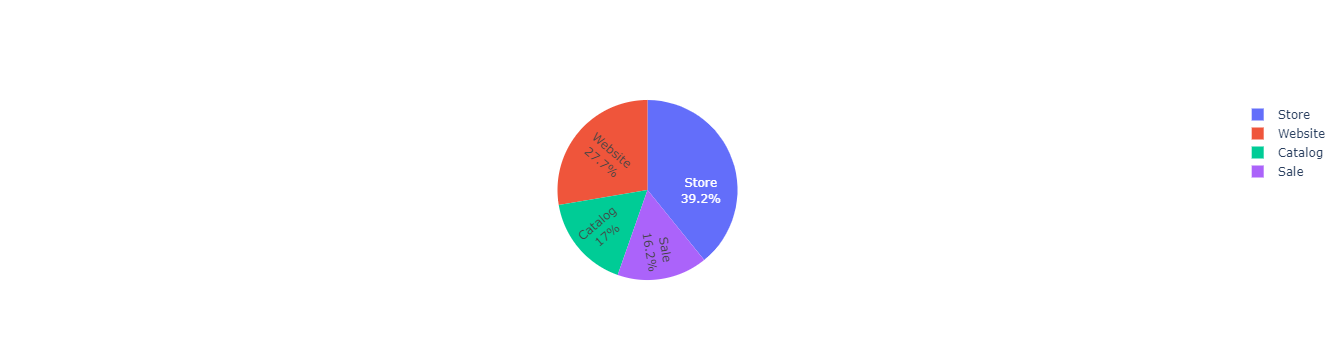

In [451]:
#measuring amont of sale per venue
purchases = []
for col in [col for col in df if col.startswith('int_num_pur_')]:
    purchases.append(df[col].sum())
    print(col)
purchases.pop()
labels = ['Sale', 'Website', 'Catalog', 'Store']

import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=labels, values=purchases, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

From the total amount and the total number of purchase we can calculate the average order volumn of each customer

In [214]:
df['flt_AOV'] = df.int_mnt_total/df.int_num_pur_total

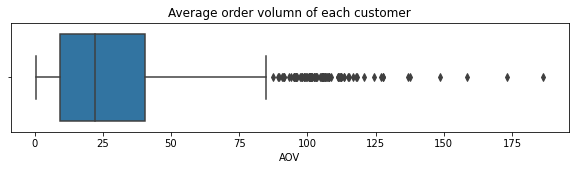

In [215]:
plot_boxplot('flt_AOV','Average order volumn of each customer', 'AOV')

#### Columns: NumWebVisitsMonth
Description: Visits to company’s website in the last month 

In [216]:
ren_colum('NumWebVisitsMonth','int_num_visit_web')

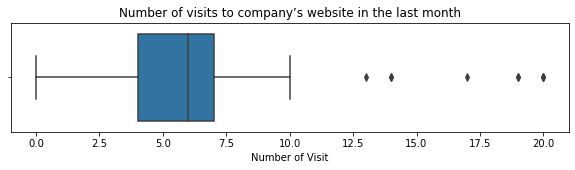

In [217]:
plot_boxplot('int_num_visit_web','Number of visits to company’s website in the last month', 'Number of Visit')

#### Columns: Accepted... and response
Description:  Order of Customer acceptance of the offer

In [218]:
ren_colum('AcceptedCmp3','int_accept_3rd')
ren_colum('AcceptedCmp4','int_accept_4th')
ren_colum('AcceptedCmp5','int_accept_5th')
ren_colum('AcceptedCmp1','int_accept_1st')
ren_colum('AcceptedCmp2','int_accept_2nd')
ren_colum('Response','int_accept_last')

In [219]:
print("Total amount of customers that accepted the offer on the:")
print("1st campaign:", sum(df['int_accept_1st']))
print("2nd campaign:", sum(df['int_accept_2nd']))
print("3rd campaign:", sum(df['int_accept_3rd']))
print("4th campaign:", sum(df['int_accept_4th']))
print("5th campaign:", sum(df['int_accept_5th']))
print("Last campaign:", sum(df['int_accept_last']))

Total amount of customers that accepted the offer on the:
1st campaign: 111
2nd campaign: 27
3rd campaign: 151
4th campaign: 155
5th campaign: 130
Last campaign: 294


#### Columns: Complain
Description:  Indicates if the customer have complained in the last 2 years

In [220]:
ren_colum('Complain','int_complain')
print("Total amount of customers that accepted complained in the last 2 years:",sum(df['int_complain']))

Total amount of customers that accepted complained in the last 2 years: 20


#### Columns to be removed
These columns can be removed as they bring constant values

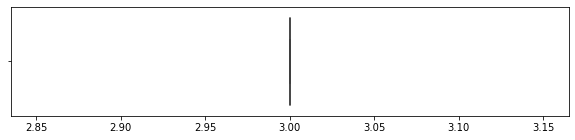

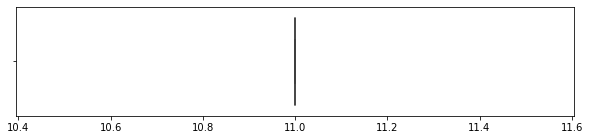

In [221]:
plot_boxplot('Z_CostContact','','')
plot_boxplot('Z_Revenue','','')

In [222]:
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

In [223]:
df.dtypes

ct_education_level                object
ct_marital_status                 object
int_income                         int64
int_qt_kidhome                     int64
int_qt_teenhome                    int64
dt_customer               datetime64[ns]
int_recency_days                   int64
int_mnt_wine                       int64
int_mnt_fruit                      int64
int_mnt_meat                       int64
int_mnt_fish                       int64
int_mnt_sweet                      int64
int_mnt_gold                       int64
int_num_pur_deal                   int64
int_num_pur_web                    int64
int_num_pur_catalog                int64
int_num_pur_store                  int64
int_num_visit_web                  int64
int_accept_3rd                     int64
int_accept_4th                     int64
int_accept_5th                     int64
int_accept_1st                     int64
int_accept_2nd                     int64
int_complain                       int64
int_accept_last 

In [224]:
# Reorder columns 
cols = ['dt_customer',
        'ct_marital_status','ct_relationship_status','ct_education_level','int_age',
        'int_education_level','int_income','flt_AOV',
        'int_qt_kidhome','int_qt_teenhome','int_qt_childrenhome',
        'int_mnt_wine','int_mnt_fruit','int_mnt_meat','int_mnt_fish','int_mnt_sweet','int_mnt_gold','int_mnt_total',
        'int_num_pur_deal','int_num_pur_web','int_num_pur_catalog','int_num_pur_store','int_num_visit_web','int_num_pur_total',
        'int_recency_days',
        'int_accept_1st','int_accept_2nd','int_accept_3rd','int_accept_4th','int_accept_5th','int_accept_last',
        'int_complain',
        'int_join_year','int_join_month','int_join_weekday']
df = df[cols]

In [225]:
# Shape
print("This dataset has", df.shape[1], "columns and", df.shape[0], "rows.")

This dataset has 35 columns and 2093 rows.


In [226]:
print(f'We have removed {round((1-df.shape[0]/2240)*100,1)}% of the dada rows through the cleaning process')

We have removed 6.6% of the dada rows through the cleaning process


## 3. Exploratory Data Analysis  <a class="anchor" id="ID3"></a>

We opt on segmenting and dissecting the data focusing on insights that have the maximum business impact. 
Thus the frame of the analysis explores only the most recent Marketing Campaign, which is our target variable in identifying profit gains for the next marketing campaign

### 3.1. Conversion Rates  <a class="anchor" id="ID3.1"></a> 

In [227]:
# Find number of non-responders vs responders to the most recent Marketing Campaign
response_counts = df_original.Response.value_counts()
no_response = round(response_counts[0]/sum(response_counts)*100)
yes_response = round(response_counts[1]/sum(response_counts)*100)

print('Proportions of Responders and Non-Responders to Total Customers:')
print(f'Did Not Convert - {no_response}%')
print(f'Converted - {yes_response}%')

Proportions of Responders and Non-Responders to Total Customers:
Did Not Convert - 85%
Converted - 15%


### 3.2. Loss Profitability Per Acquisition  <a class="anchor" id="ID3.2"></a> 

In [297]:
# Loss per each customer targted by campaign
cost_to_contact_customer = -6720/2240
print(f'Loss per each customer targted by campaign {cost_to_contact_customer} MU/customer')

profit_per_customer = 3674/df_original.Response.sum() - 6720/2240
print(f'Profit per customer that accepted by campaign {profit_per_customer} MU/customer')

Loss per each customer targted by campaign -3.0 MU/customer
Profit per customer that accepted by campaign 8.0 MU/customer


In [300]:
# calculate the profitability of the last campain

conditions = [df['int_accept_last'] == 1, df['int_accept_last'] == 0]
outcomes = [profit_per_customer, cost_to_contact_customer]

df['int_profit'] = np.select(conditions, outcomes)

### 3.3. Total Amount Spent  <a class="anchor" id="ID3.3"></a> 

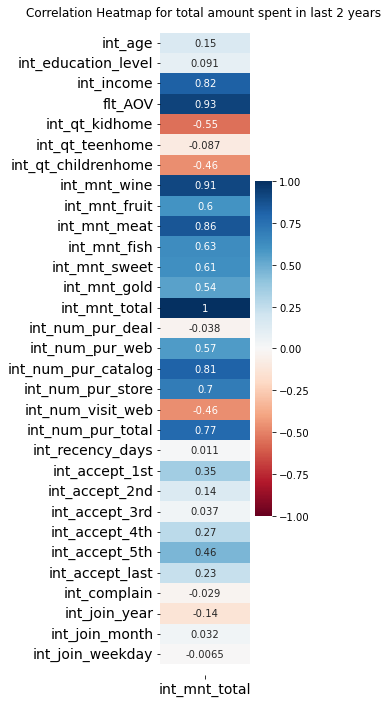

In [228]:
# See the correlation between variables and sale through heatmap
plt.figure(figsize = (2, 12))
s = sns.heatmap(df.corr().loc[:,['int_mnt_total']],  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0,annot=True,)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 14)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 14)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap for total amount spent in last 2 years ")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

High-Income People tend to spend more.

Therefore we can find out how conversion and profitability vary with customer Income.

Thus, we examine the distribution of customer's income variable and create appropriate bins, then plot these against the customer responses

### 3.4. Income <a class="anchor" id="ID3.4"></a> 

Text(0, 0.5, 'Density')

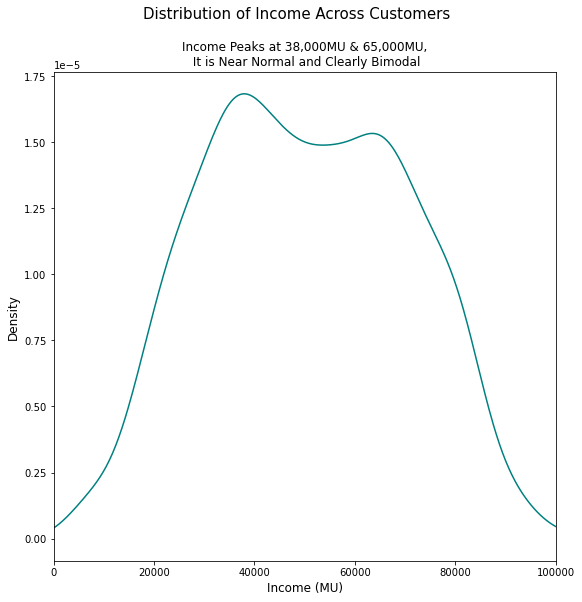

In [251]:
plt.figure(figsize = (9, 9))
df['int_income'].plot(kind = 'kde', color = 'teal')
plt.xlim([0, 100000])
plt.title('Income Peaks at 38,000MU & 65,000MU,\n It is Near Normal and Clearly Bimodal', size = 12)
plt.suptitle('Distribution of Income Across Customers', size = 15)
plt.xlabel('Income (MU)', size = 12)
plt.ylabel('Density', size = 12)

Text(0.5, 0, 'Number of Customers')

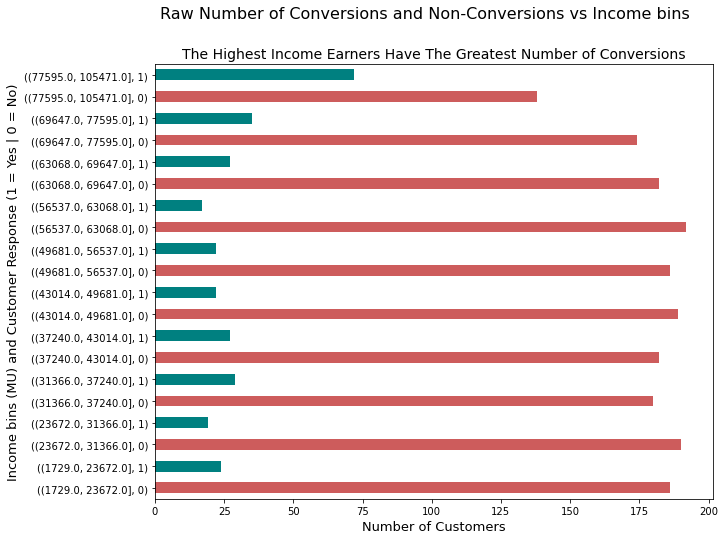

In [252]:
# Create  10 bins with "int_income" variable equally divided
df['ds_income_bins'] = pd.qcut(df.int_income, q = 10, precision = 0)

# graph that shows the raw number of customer conversions segmented by income bins
df.groupby('ds_income_bins')['int_accept_last'].value_counts().plot(kind = 'barh',
                                                               color = ['indianred','teal'],
                                                               figsize = (10, 8))

plt.title('The Highest Income Earners Have The Greatest Number of Conversions', size = 14)
plt.suptitle('Raw Number of Conversions and Non-Conversions vs Income bins', size = 16)
plt.ylabel('Income bins (MU) and Customer Response (1 = Yes | 0 = No)', size = 13)
plt.xlabel('Number of Customers', size = 13)

In [260]:
#calculating the rate of convertion
income_vs_conv = pd.crosstab(df['ds_income_bins'], df['int_accept_last'])

income_vs_conv['Conversion Rate (%)'] = \
              round((income_vs_conv[1]/(income_vs_conv[0]
              + income_vs_conv[1]))*100, 2)

income_vs_conv.sort_values(by = 'Conversion Rate (%)', ascending = False)

int_accept_last,0,1,Conversion Rate (%)
ds_income_bins,,,
"(77595.0, 105471.0]",138,72,34.29
"(69647.0, 77595.0]",174,35,16.75
"(31366.0, 37240.0]",180,29,13.88
"(37240.0, 43014.0]",182,27,12.92
"(63068.0, 69647.0]",182,27,12.92
"(1729.0, 23672.0]",186,24,11.43
"(49681.0, 56537.0]",186,22,10.58
"(43014.0, 49681.0]",189,22,10.43
"(23672.0, 31366.0]",190,19,9.09


The greatest number and rate of conversions (green bars) are the two highest income bins

Text(0.5, 0, 'Profit/Loss (MU)')

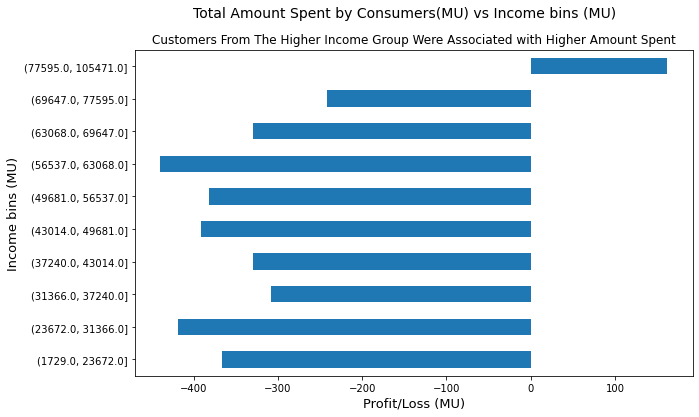

In [457]:
# calculating the amount spent
df.groupby('ds_income_bins')['int_profit'].sum().plot(kind = 'barh',figsize = (10, 6))


plt.title('Customers From The Higher Income Group Were Associated with Higher Amount Spent', size = 12)

plt.suptitle('Total Amount Spent by Consumers(MU) vs Income bins (MU)', size = 14)

plt.ylabel('Income bins (MU)', size = 13)
plt.xlabel('Profit/Loss (MU)', size = 13)

The marketing campaign resulted in losses for each and every single customer group except the highest incoming earning group when segmented by Income level.

This analysis imply that the marketing campaign appeals the most to high income groups. They have the greatest conversion and the only profitable income group.

A future marketing campaign that should target high-income customers, specifically those earning above $77,000 per year

### 3.5. Age  <a class="anchor" id="ID3.5"></a> 

Investigating the conversion rates and market campaign profitability when customers are segmented by Age

count    2093.000000
mean       44.237458
std        11.710681
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: int_age, dtype: float64

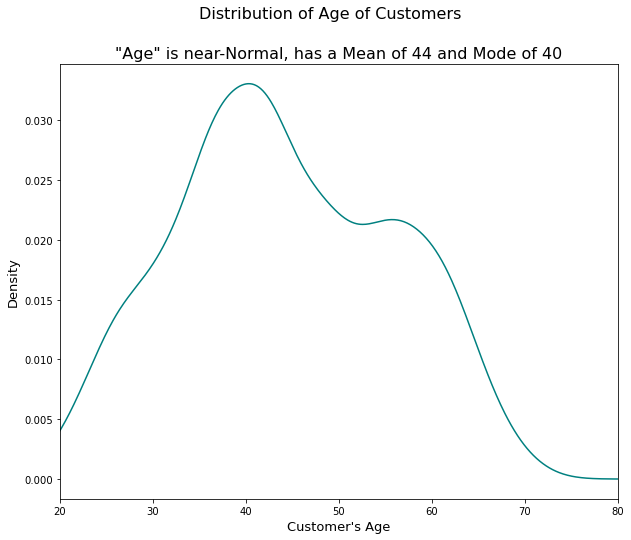

In [255]:
# Create "Age" variable and plot histogram

df['int_age'].plot(kind = 'kde', color = 'teal',figsize = (10, 8))
plt.xlim([20, 80])

plt.title('"Age" is near-Normal, has a Mean of 44 and Mode of 40', size = 16)
plt.suptitle('Distribution of Age of Customers', size = 16)
plt.xlabel('Customer\'s Age', size = 13)
plt.ylabel('Density', size = 13)

df['int_age'].describe()

In [267]:
# create Age bins
df['ds_age_bins'] = pd.cut(df['int_age'],bins = [10, 20, 30, 40,50, 60, 70])

Text(0.5, 0.98, 'Conversion Percentage by Age Group')

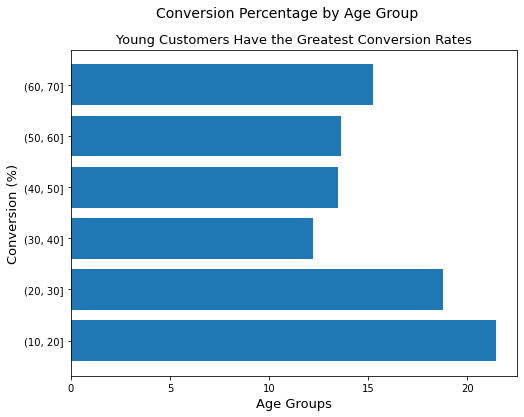

In [282]:
# plot conversion rates against age groups

age_conv_rate = pd.crosstab(df['ds_age_bins'], df['int_accept_last'])

age_conv_rate['Conversion %'] = \
              round((age_conv_rate[1]/(age_conv_rate[0]+age_conv_rate[1]))*100, 2)

age_conv_rate.reset_index(inplace = True)
age_conv_rate['ds_age_bins'] = age_conv_rate['ds_age_bins'].astype(str)

plt.figure(figsize = (8, 6))
plt.barh(age_conv_rate['ds_age_bins'],
        age_conv_rate['Conversion %'])

plt.xlabel('Age Groups', size = 13)
plt.ylabel('Conversion (%)', size = 13)
plt.title('Young Customers Have the Greatest Conversion Rates', size = 13)
plt.suptitle('Conversion Percentage by Age Group', size = 14)

Customers with ages in the intervals of 10 and 30 have the greatest conversion rates.
Conversely, customers above 40 have the worst conversion rate (between 12% and 14%)

Text(0.5, 0.98, 'Marketing Campaign Profitability by Age Group')

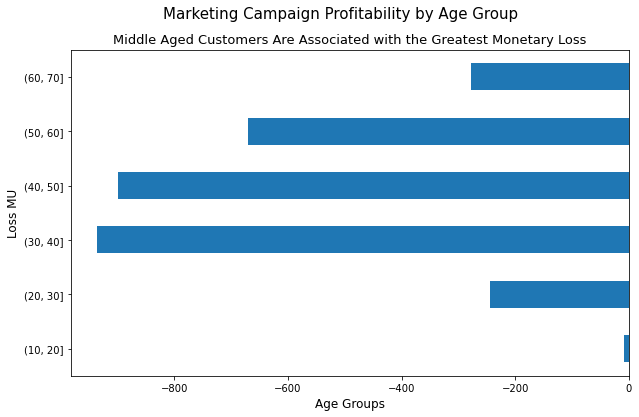

In [309]:
df.groupby('ds_age_bins')['int_profit'].sum().plot.barh(figsize = (10, 6))
plt.ylabel('Loss MU', size = 12)
plt.xlabel('Age Groups', size = 12)
plt.title('Middle Aged Customers Are Associated with the Greatest Monetary Loss',
             size = 13)
plt.suptitle('Marketing Campaign Profitability by Age Group', size = 15)

None of the group of customers segmented by Age proved to be profitable in our most recent Marketing Campaign. Even in those Age Groups where the conversion rate is the highest, it is still not high enough for the marketing campaign to be profitable. Therefore, targeting customers by age does not seem like a good idea for future marketing campaigns

### 3.6. Education <a class="anchor" id="ID3.6"></a> 

Investigating the conversion rates and market campaign profitability when customers are segmented by Education Level

<AxesSubplot:ylabel='ct_education_level'>

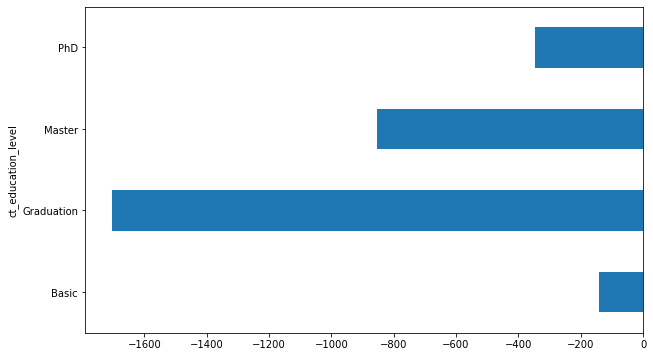

In [318]:
# find sum of profit per value of "Education"
df.groupby('ct_education_level')['int_profit'].sum().plot.barh(figsize = (10, 6))

All customers when segmented by Education are associated with losses. These findings suggest that future marketing campaigns should not target or segment customers on the basis of this characteristic.

### 3.7. Living Arrangements <a class="anchor" id="ID3.7"></a> 

(array([0, 1]), [Text(0, 0, 'Individual'), Text(0, 1, 'With Family')])

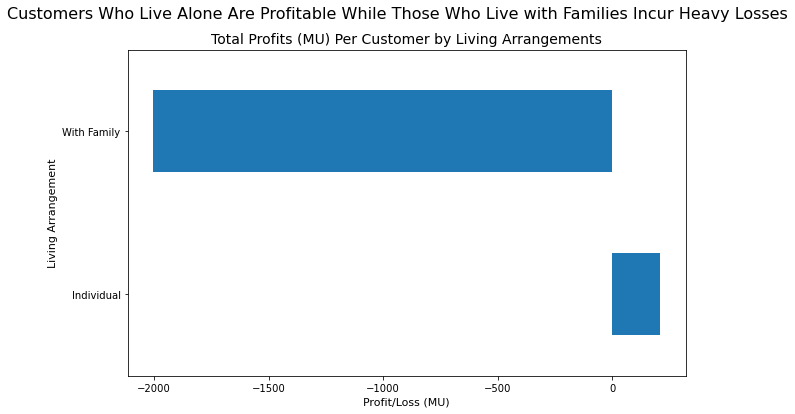

In [458]:
#“Individuals” to be customers who are Single and 
#have no children, and therefore do not live with them

individuals = df.loc[(df['ct_relationship_status'] == 'Not in a Relationship') &
                       (df['int_qt_childrenhome'] == 0)]
#“With Family” to be customers who are either Single 
#or Married but have at least 1 child or 1 teen living in the same house
families = df.loc[(df['int_qt_childrenhome'] == 1)]

# create a Series with the sum of Profit for above dataframes

ind_vs_family_profit = pd.Series([individuals.groupby('int_income')['int_profit'].sum().sum(),
                                  families.groupby('int_income')['int_profit'].sum().sum()],
                                  index = ['Individual', 'With Family'])
ind_vs_family_profit.plot(kind = 'barh',
                          figsize = (10, 6))
plt.suptitle('Customers Who Live Alone Are Profitable While Those Who Live with Families Incur Heavy Losses',
              size = 16)
plt.title('Total Profits (MU) Per Customer by Living Arrangements',
          size = 14)
plt.xlabel('Profit/Loss (MU)', size = 11)
plt.ylabel('Living Arrangement', size = 11)
plt.xticks(size = 10)
plt.yticks(size = 10)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

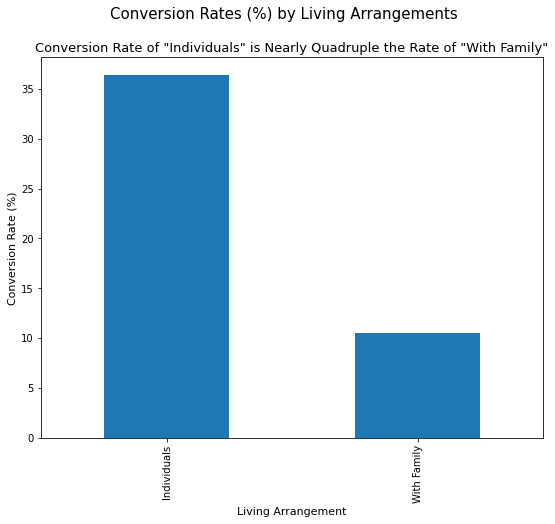

In [334]:
# rate of convergence

ind_vs_family_conv = pd.Series([round((individuals.int_accept_last.sum()/len(individuals))*100, 2),
                                round((families.int_accept_last.sum()/len(families))*100, 2)],
                                index = ['Individuals', 'With Family'])

ind_vs_family_conv.plot(kind = 'bar',
                        figsize = (9, 7))
plt.title('Conversion Rate of "Individuals" is Nearly four times the Rate of "With Family"',
             size = 13)
plt.suptitle('Conversion Rates (%) by Living Arrangements',
          size = 15)
plt.xlabel('Living Arrangement', size = 11)
plt.ylabel('Conversion Rate (%)', size = 11)
plt.xticks(size = 10)
plt.yticks(size = 10)

When we market to single customers the marketing campaign is effective and profitable. This imply that the marketing campaign is effective with single individuals.

## 4. Clustering Analysis  <a class="anchor" id="ID4"></a>

In [351]:
df_clustering = df.drop(['dt_customer', 'int_education_level',
                           'int_accept_1st','int_accept_2nd','int_accept_3rd','int_accept_4th',
                           'int_accept_5th','int_complain','int_join_year',
                           'int_join_month','int_join_weekday','int_income_deciles','ds_income_bins',
                           'ds_age_bins','int_profit'], axis = 1)

In [352]:
# create dummies categorical variables and concatenate to dataframe

dummies = pd.get_dummies(df['ct_marital_status'])
df_clustering = pd.concat([df_clustering,dummies], axis = 1)

dummies = pd.get_dummies(df['ct_relationship_status'])
df_clustering = pd.concat([df_clustering,dummies], axis = 1)

dummies = pd.get_dummies(df['ct_education_level'])
df_clustering = pd.concat([df_clustering,dummies], axis = 1)

# and drop original "marital_status" variable

df_clustering.drop('ct_marital_status', axis = 1, inplace = True)
df_clustering.drop('ct_relationship_status', axis = 1, inplace = True)
df_clustering.drop('ct_education_level', axis = 1, inplace = True)                  

### 4.1. Correlation  <a class="anchor" id="ID4.1"></a>

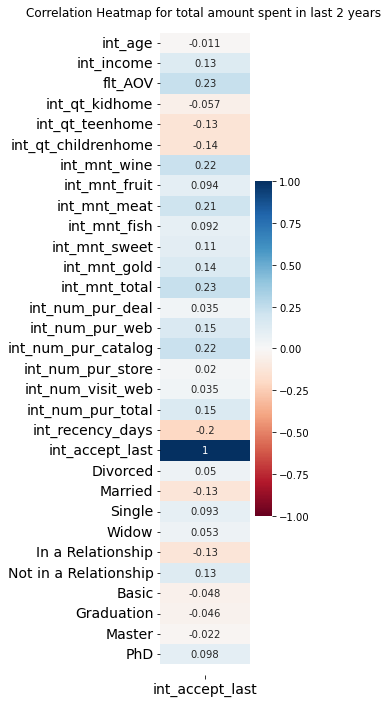

In [381]:
corr = df_clustering.corr().loc[:,['int_accept_last']]
plt.figure(figsize = (2, 12))
s = sns.heatmap(corr,  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0,annot=True,)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 14)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 14)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap for total amount spent in last 2 years ")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

We are only interested in the last column. We see that even the features with the greatest correlation with the outcome variable have only a weak-to-moderate magnitude. Thus only those features where the absolute magnitude of correlation coefficient is > 0.12 are selected

In [392]:
df_relevant = df_clustering.loc[:, ['int_income','int_qt_kidhome',
                                    'int_mnt_wine','int_mnt_meat','int_mnt_gold',
                                    'int_num_pur_catalog','In a Relationship',
                                    'Not in a Relationship','int_accept_last']]

### 4.2. Scale data  <a class="anchor" id="ID4.2"></a>

In [393]:
# create a copy of relevant dataframe
df_clustering_copy = df_relevant.copy()
scaler = MinMaxScaler() # We use MinMaxScaler  
                        # because the variables are noneparametric
data_scaled = scaler.fit_transform(df_clustering_copy)

# convert scaled data back into dataframe
df_clustering_copy_scaled = pd.DataFrame(data_scaled)

# re-assign names
column_names = list(df_clustering_copy.columns)
df_clustering_copy_scaled.columns = column_names

### 4.3. Fit K-Means Clustering Algorithm  <a class="anchor" id="ID4.3"></a>

Find optimal number of clusters through Sum of Squared Error 

C:\Users\carolina.cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carolina.cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carolina.cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carolina.cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

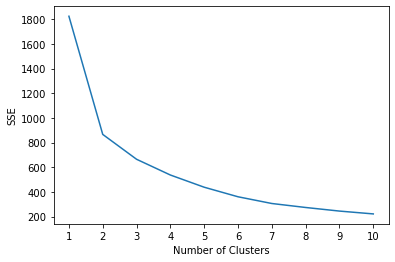

In [394]:
# find sum of squared error per number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clustering_copy_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [401]:
# fit and transform data to create 5 clusters
km = KMeans(n_clusters = 5)
km.fit(df_clustering_copy_scaled)

# predict clusters for each row in original dataframe
# with non-scaled values
df_clustering_copy['clusters'] = km.labels_

C:\Users\carolina.cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [406]:
df_clustering_copy["cluster_0"] = df_clustering_copy.clusters == 0
df_clustering_copy["cluster_1"] = df_clustering_copy.clusters == 1
df_clustering_copy["cluster_2"] = df_clustering_copy.clusters == 2
df_clustering_copy["cluster_3"] = df_clustering_copy.clusters == 3
df_clustering_copy["cluster_4"] = df_clustering_copy.clusters == 5

### 4.4. Convergence per cluster   <a class="anchor" id="ID4.4"></a>

In [459]:
# find how many customers converted in each cluster
df_clustering_copy.groupby("clusters")['int_accept_last'].sum()

clusters
0      0
1      0
2    145
3      0
4    149
Name: int_accept_last, dtype: int64

In [462]:
# percentage of convergency in each cluster
df_clustering_copy.groupby("clusters")['int_accept_last'].sum()/df_clustering_copy.groupby("clusters")['int_accept_last'].count()

clusters
0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: int_accept_last, dtype: float64

In [461]:
# quantity of customers in each cluster
df_clustering_copy.groupby("clusters")['int_accept_last'].count()

clusters
0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: int_accept_last, dtype: float64

### 4.5. Custering Centroides   <a class="anchor" id="ID4.5"></a>

In [409]:
df_clustering_copy.groupby('clusters').mean()

,int_income,int_qt_kidhome,int_mnt_wine,int_mnt_meat,int_mnt_gold,int_num_pur_catalog,In a Relationship,Not in a Relationship,int_accept_last,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
clusters,,,,,,,,,,,,,,
0,48413.302564,0.480342,250.490598,122.470085,40.733333,2.205128,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,68900.743982,0.056893,572.547046,284.903720,68.614880,4.807440,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,56931.096552,0.441379,501.751724,232.289655,61.151724,4.041379,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,37794.195509,0.727873,83.346103,35.175694,20.359313,0.704095,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56885.315436,0.335570,449.939597,241.214765,58.845638,3.798658,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


All customers from cluster 2 and 4 accepted the offer in the last campaign, it implies that the traits of customers in these cluster are significantly correlated with a higher likelihood of conversion.

I want to reiterate this finding a different way because it is quite important: every customer who converted was in Cluster 2, but not all customers in Cluster 2 converted.

Using the main characteristics of the groups we will be able to better isolate relevant customers for our next marketing campaign and make this campaign more targeted. As a result, the next marketing campaign should see much greater conversion and profitability overall